In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
from scipy import stats
import os 
import datetime as dt


In [2]:

college_wage_premium=pd.read_csv("/kaggle/input/usa-wage-comparison-for-college-vs-high-school/college_wage_premium.csv",index_col='year', parse_dates=True)

In [3]:
college_wage_premium.head()

,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
year,,,,,,
2022-01-01,21.94,41.60,24.08,49.01,18.93,34.39
2021-01-01,22.28,41.32,24.36,47.83,19.36,35.08
2020-01-01,22.70,41.65,25.09,48.15,19.35,35.41
2019-01-01,21.64,39.61,23.99,45.74,18.48,33.80
2018-01-01,21.50,38.87,23.72,44.97,18.49,33.03


In [4]:
college_wage_premium.info()  #information on the nature of the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2022-01-01 to 1973-01-01
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   high_school             50 non-null     float64
 1   bachelors_degree        50 non-null     float64
 2   men_high_school         50 non-null     float64
 3   men_bachelors_degree    50 non-null     float64
 4   women_high_school       50 non-null     float64
 5   women_bachelors_degree  50 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [5]:
college_wage_premium.isnull().sum()/college_wage_premium.shape[0] #percentage of missing data


high_school               0.0
bachelors_degree          0.0
men_high_school           0.0
men_bachelors_degree      0.0
women_high_school         0.0
women_bachelors_degree    0.0
dtype: float64

In [6]:
college_wage_premium.drop_duplicates().head(2) #remove duplicates

,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
year,,,,,,
2022-01-01,21.94,41.60,24.08,49.01,18.93,34.39
2021-01-01,22.28,41.32,24.36,47.83,19.36,35.08


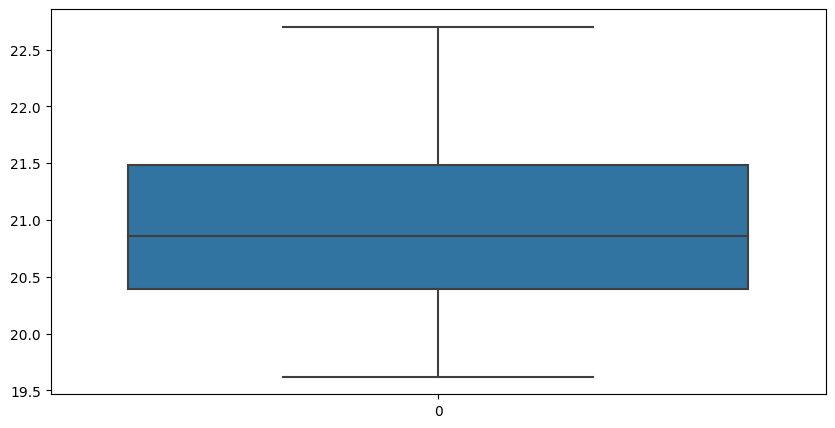

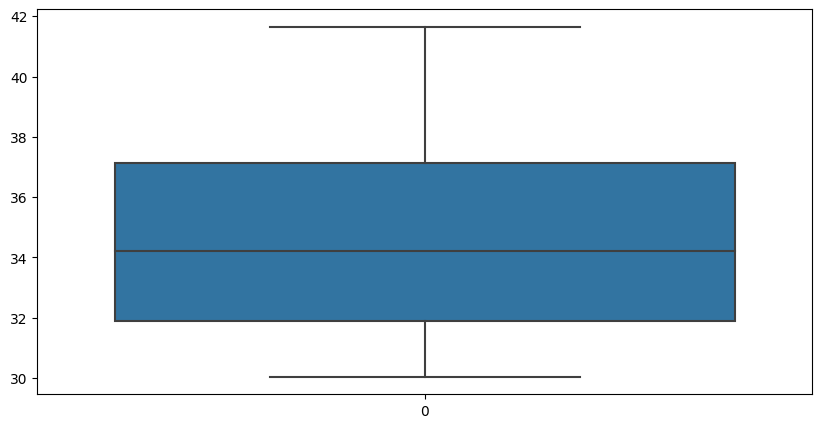

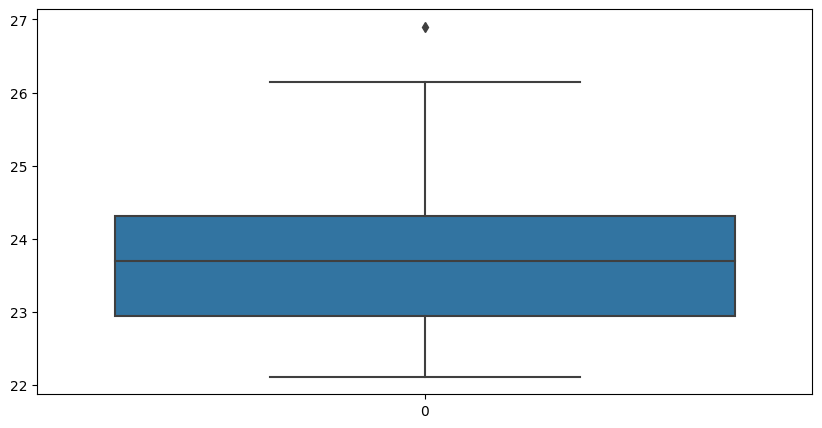

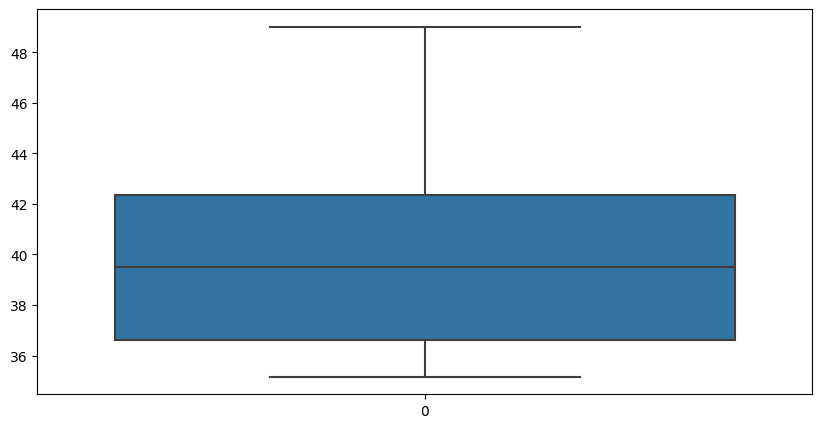

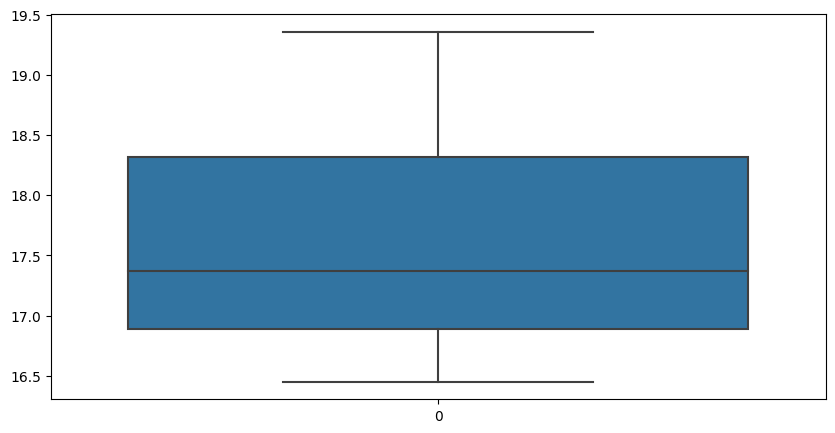

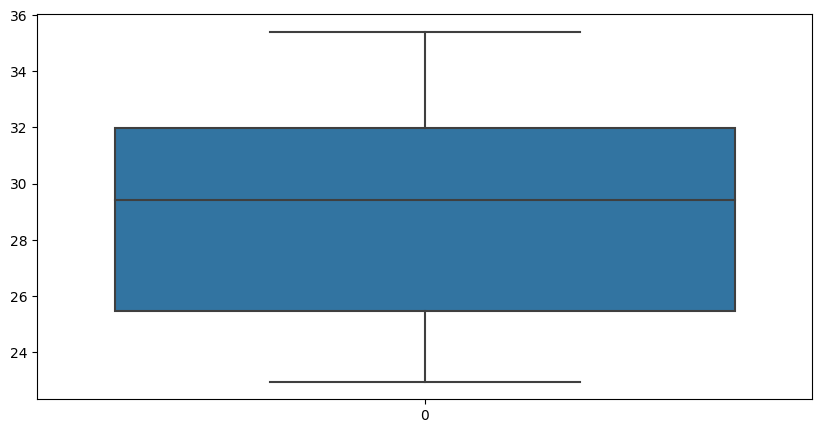

In [7]:
#WE VISUALIZE ABBERANT VALUES
for col  in college_wage_premium.select_dtypes('float64'):
    plt.figure(figsize=(10,5))
    sns.boxplot(college_wage_premium[col])
    

#### one-dimensional analysis

In [8]:
college_wage_premium.describe().T

,count,mean,std,min,25%,50%,75%,max
high_school,50.0,20.8766,0.742743,19.62,20.3925,20.855,21.4800,22.70
bachelors_degree,50.0,34.7686,3.306645,30.04,31.8750,34.205,37.1225,41.65
men_high_school,50.0,23.8326,1.225697,22.11,22.9450,23.695,24.3075,26.90
men_bachelors_degree,50.0,39.9884,3.734945,35.16,36.6050,39.485,42.3400,49.01
women_high_school,50.0,17.5716,0.854342,16.45,16.8900,17.370,18.3175,19.36
women_bachelors_degree,50.0,28.9264,3.760532,22.94,25.4625,29.425,31.9750,35.41


/tmp/ipykernel_20/1604951071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(college_wage_premium[col], color='red')
/tmp/ipykernel_20/1604951071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(college_wage_premium[col], color='red')
/tmp/ipykernel_20/1604951071.py:3: UserWarning: 

`dis

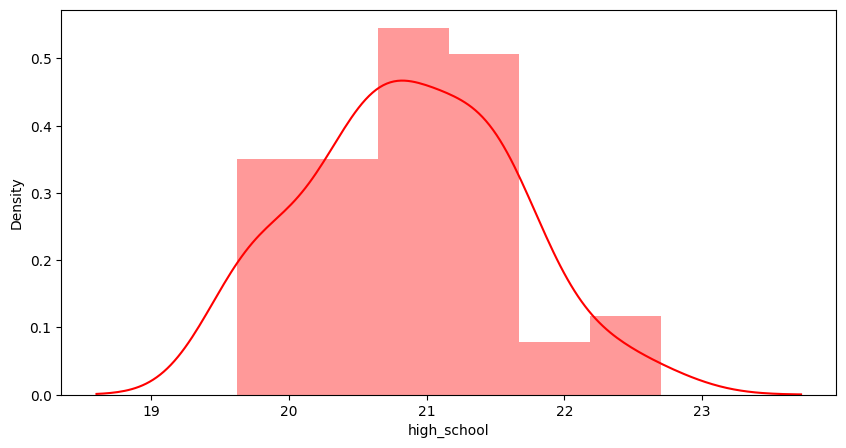

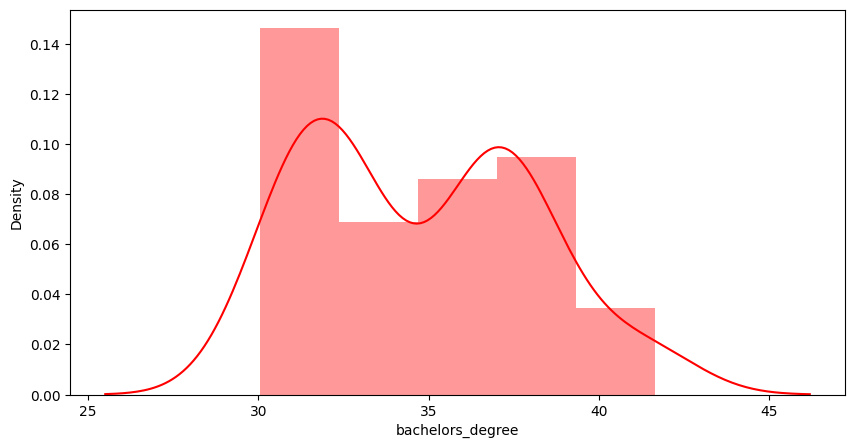

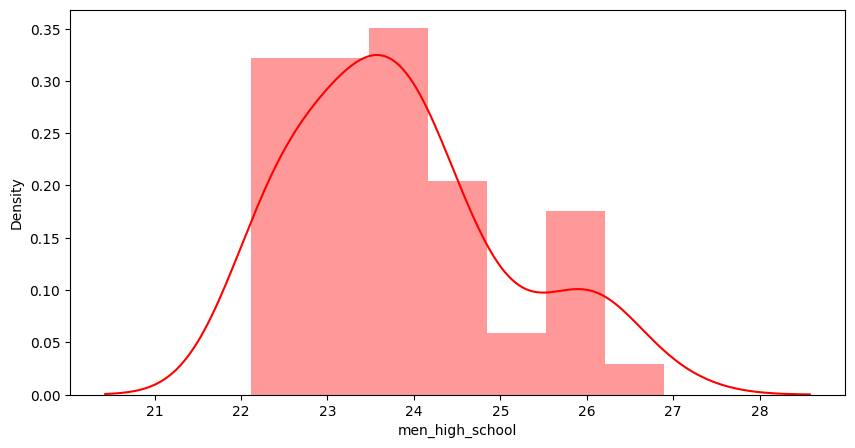

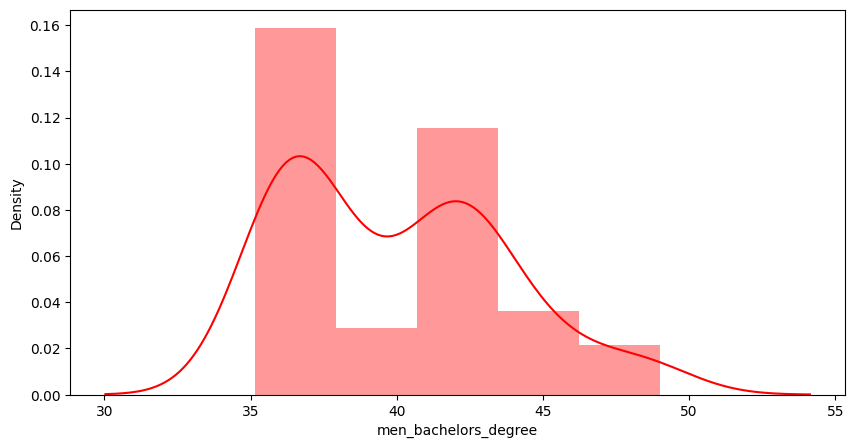

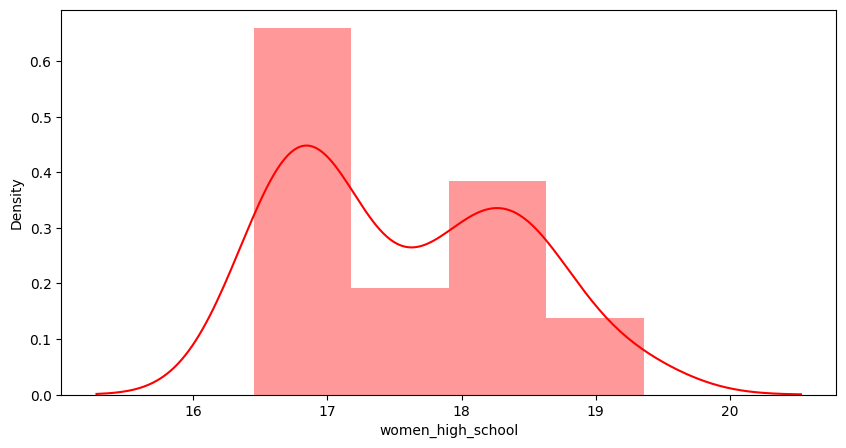

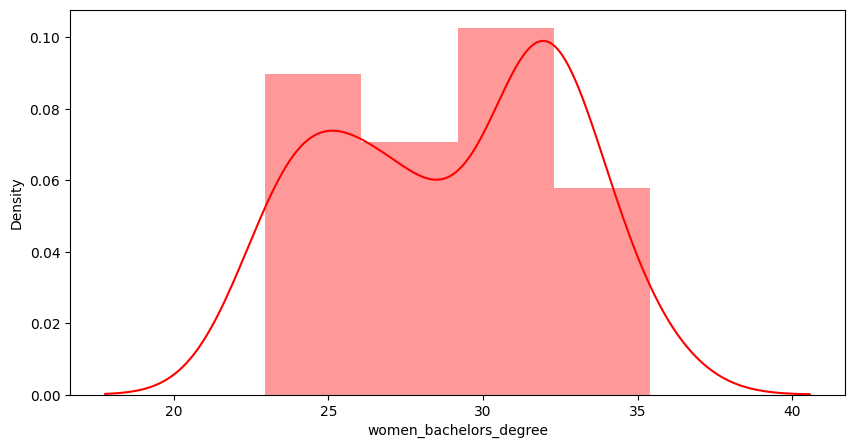

In [9]:
for col  in college_wage_premium.select_dtypes('float64'):
    plt.figure(figsize=(10,5))
    sns.distplot(college_wage_premium[col], color='red')

In [10]:
def norm_test(col):
    p=0.05
    p_value=stats.shapiro(college_wage_premium[col]).pvalue
    if p_value>p :
        return 'normal'
    else:
        return 'no normal'

In [11]:
for col in college_wage_premium.select_dtypes('float64'):
    print(f'{col:-<50}{norm_test(col)}')

high_school---------------------------------------normal
bachelors_degree----------------------------------no normal
men_high_school-----------------------------------no normal
men_bachelors_degree------------------------------no normal
women_high_school---------------------------------no normal
women_bachelors_degree----------------------------no normal


##### analysis of two-dimensional studies

Analyze the general trend in the wage gap between college graduates and high school graduates over the years.

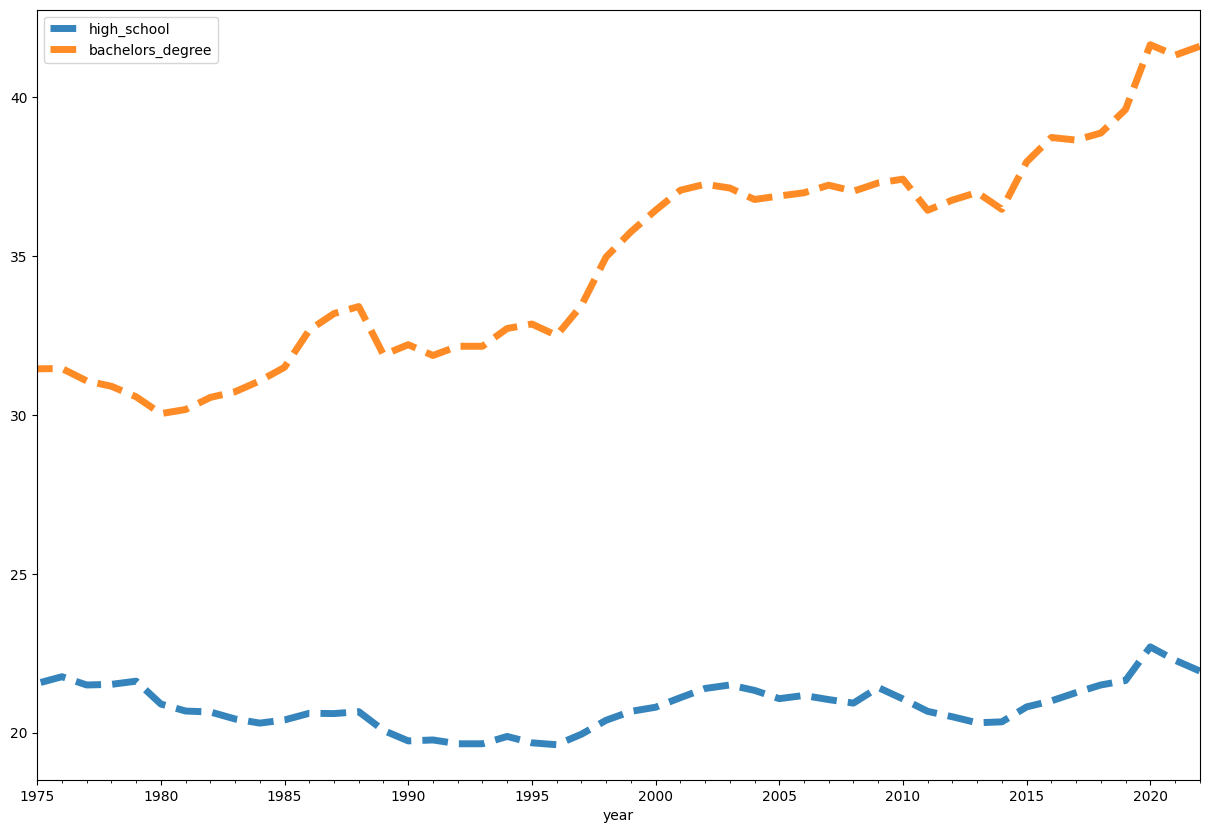

In [12]:
plt.figure(figsize=(15,10))
college_wage_premium.loc['1975':'2022','high_school'].plot(label='high_school',lw=5,ls='--',alpha=0.9)
college_wage_premium.loc['1975':'2022','bachelors_degree'].plot(label='bachelors_degree',lw=5,ls='--',alpha=0.9)
plt.legend()
plt.show()

2.Determine whether the pay gap has narrowed or widened for different genders.

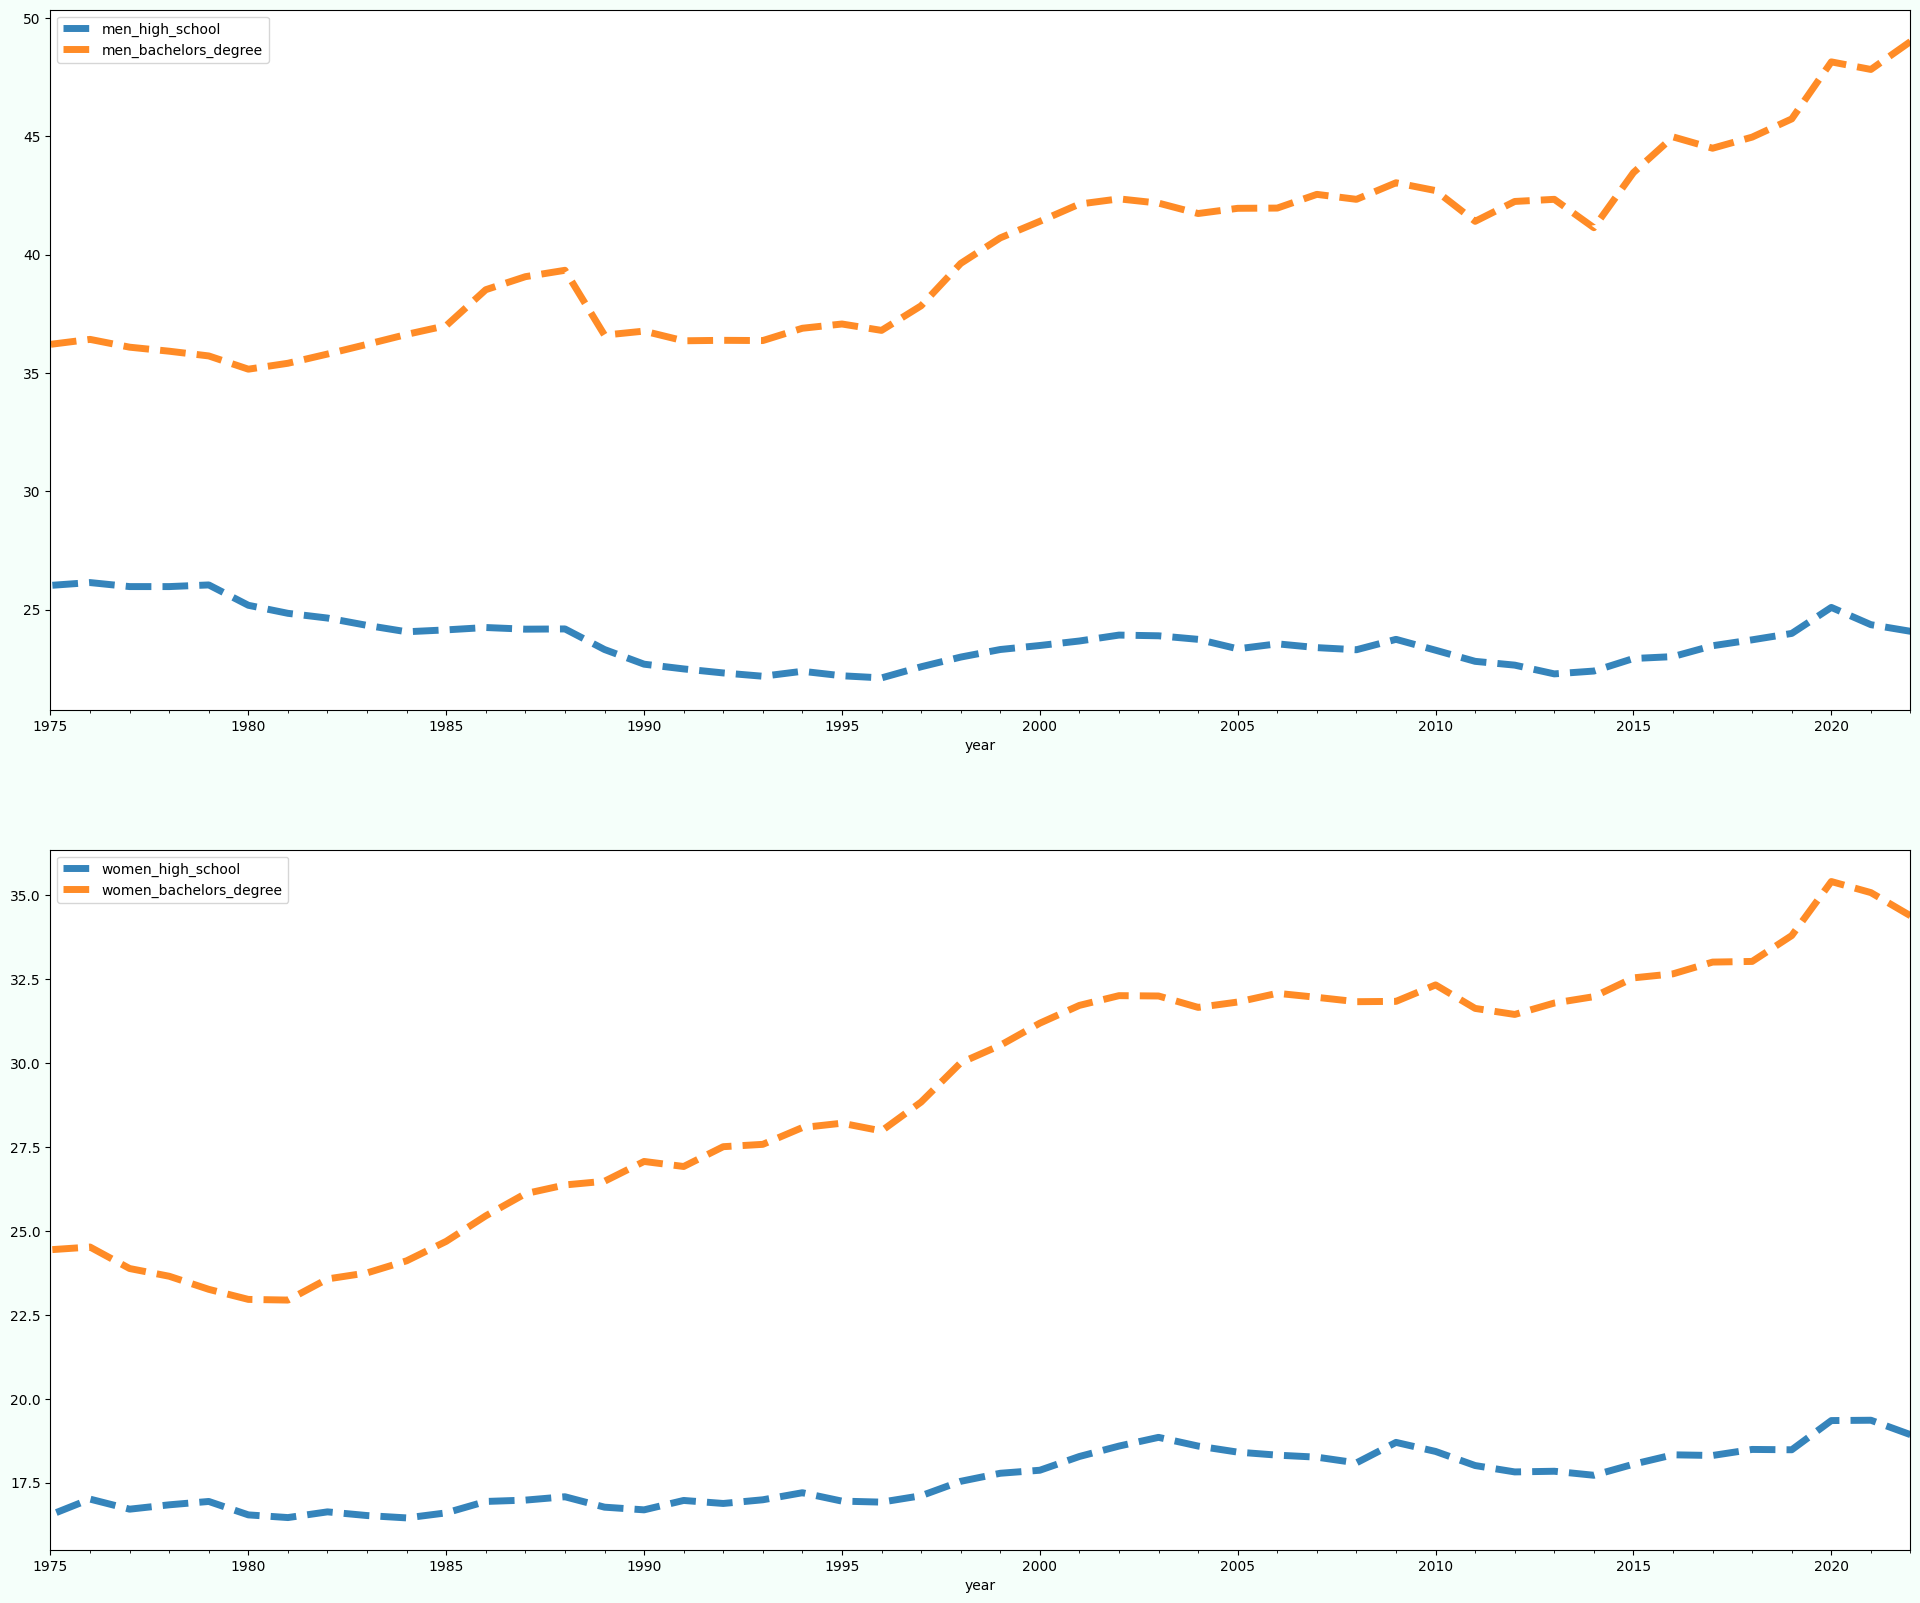

In [13]:
fig , ax =plt.subplots(
 2, 1,
 figsize=(24, 20),
 facecolor="mintcream")
college_wage_premium.loc['1975':'2022','men_high_school'].plot(label='men_high_school',lw=5,ls='--',alpha=0.9,ax=ax[0])
college_wage_premium.loc['1975':'2022','men_bachelors_degree'].plot(label='men_bachelors_degree',lw=5,ls='--',alpha=0.9,ax=ax[0])
college_wage_premium.loc['1975':'2022','women_high_school'].plot(label='women_high_school',lw=5,ls='--',alpha=0.9,ax=ax[1])
college_wage_premium.loc['1975':'2022','women_bachelors_degree'].plot(label='women_bachelors_degree',lw=5,ls='--',alpha=0.9,ax=ax[1])
ax[1].legend()
ax[0].legend()
plt.show()


3.Determine the year(s) when the wage gap was at its lowest and highest point.

In [14]:
college_wage_premium['ecart_salaire']= abs(college_wage_premium['high_school']-college_wage_premium['bachelors_degree'])

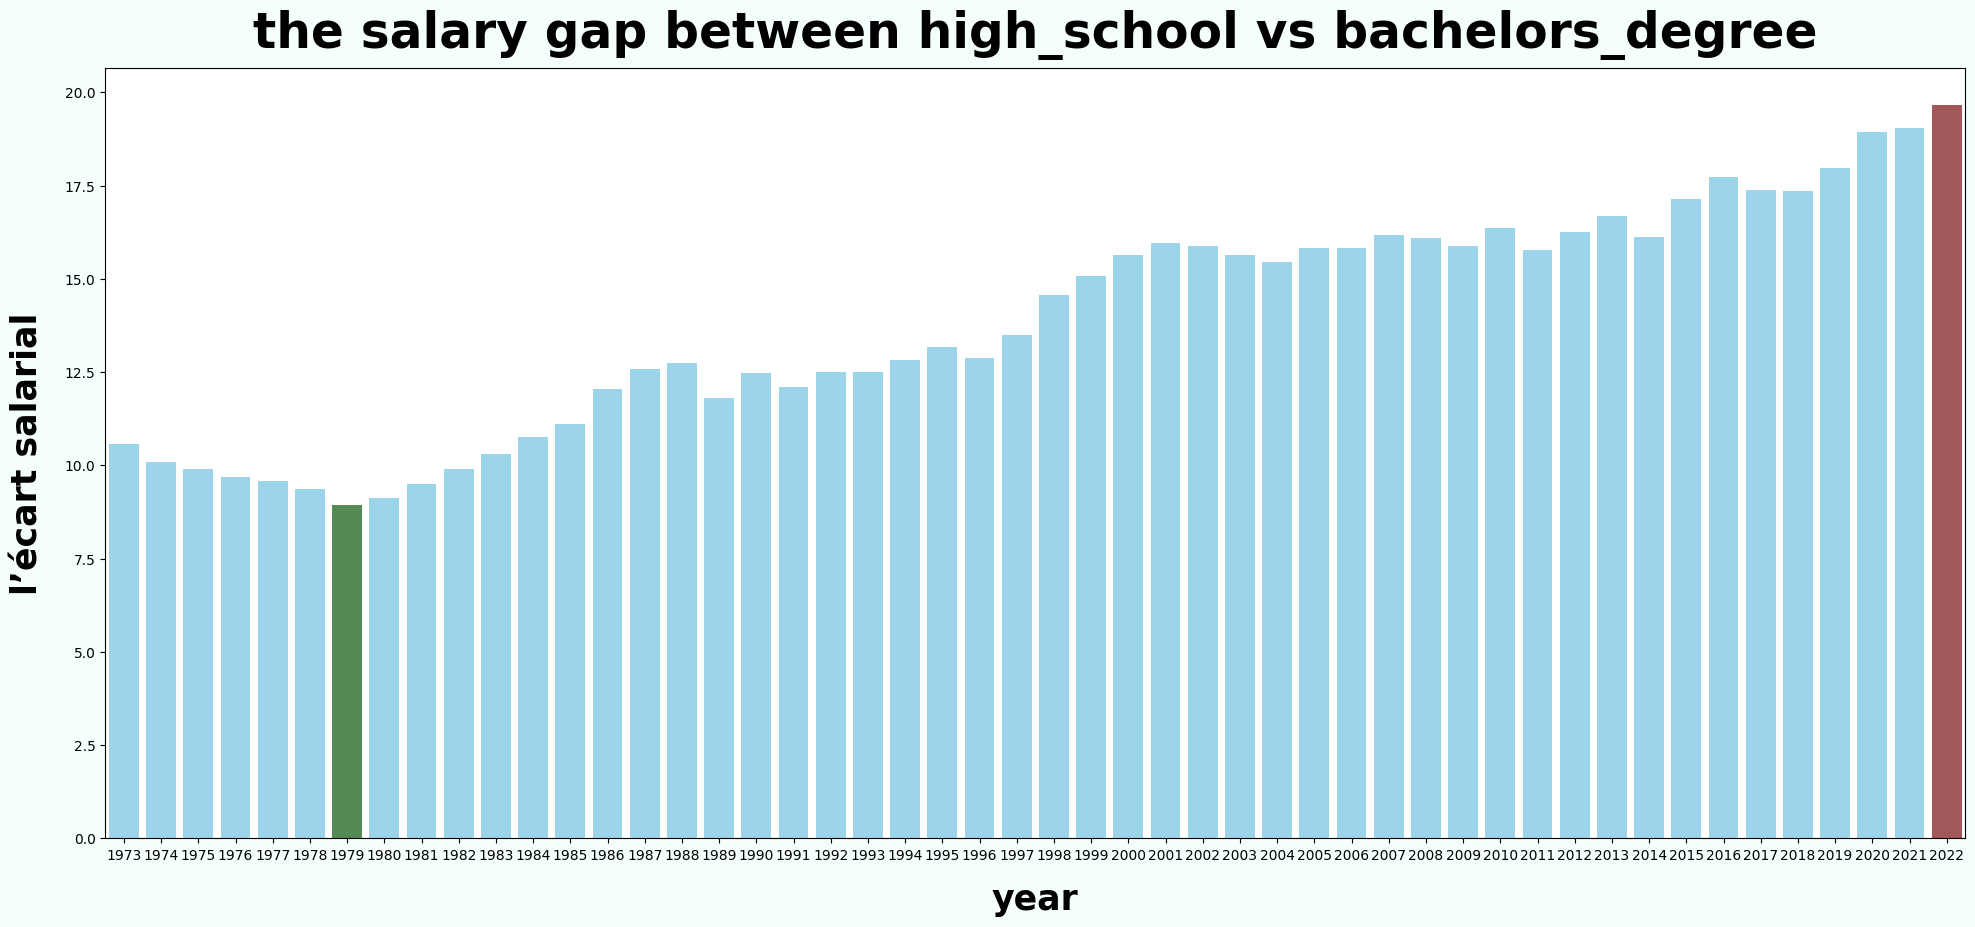

In [15]:
color_map = ["#5FCDF5" for _ in range(100)]
color_map[49] = "#8B0000"
color_map[6] = "#006400"
sns.set_palette(sns.color_palette(color_map))
fig, ax = plt.subplots(
 1, 1,
 figsize=(24, 10),
 facecolor="mintcream")
sns.barplot(
 x=college_wage_premium.index.year,
 y=college_wage_premium["ecart_salaire"],
 palette=color_map,
 alpha=.7,
 ax=ax
 )
ax.set_title(
 "the salary gap between high_school vs bachelors_degree",
 fontname="fantasy",
 weight="bold",
 fontsize=35,
 pad=15)
ax.set_ylabel(
 "l’écart salarial",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
ax.set_xlabel(
 "year",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
plt.show()

Identify the demographic group(s) that have experienced the largest increase in wages over time

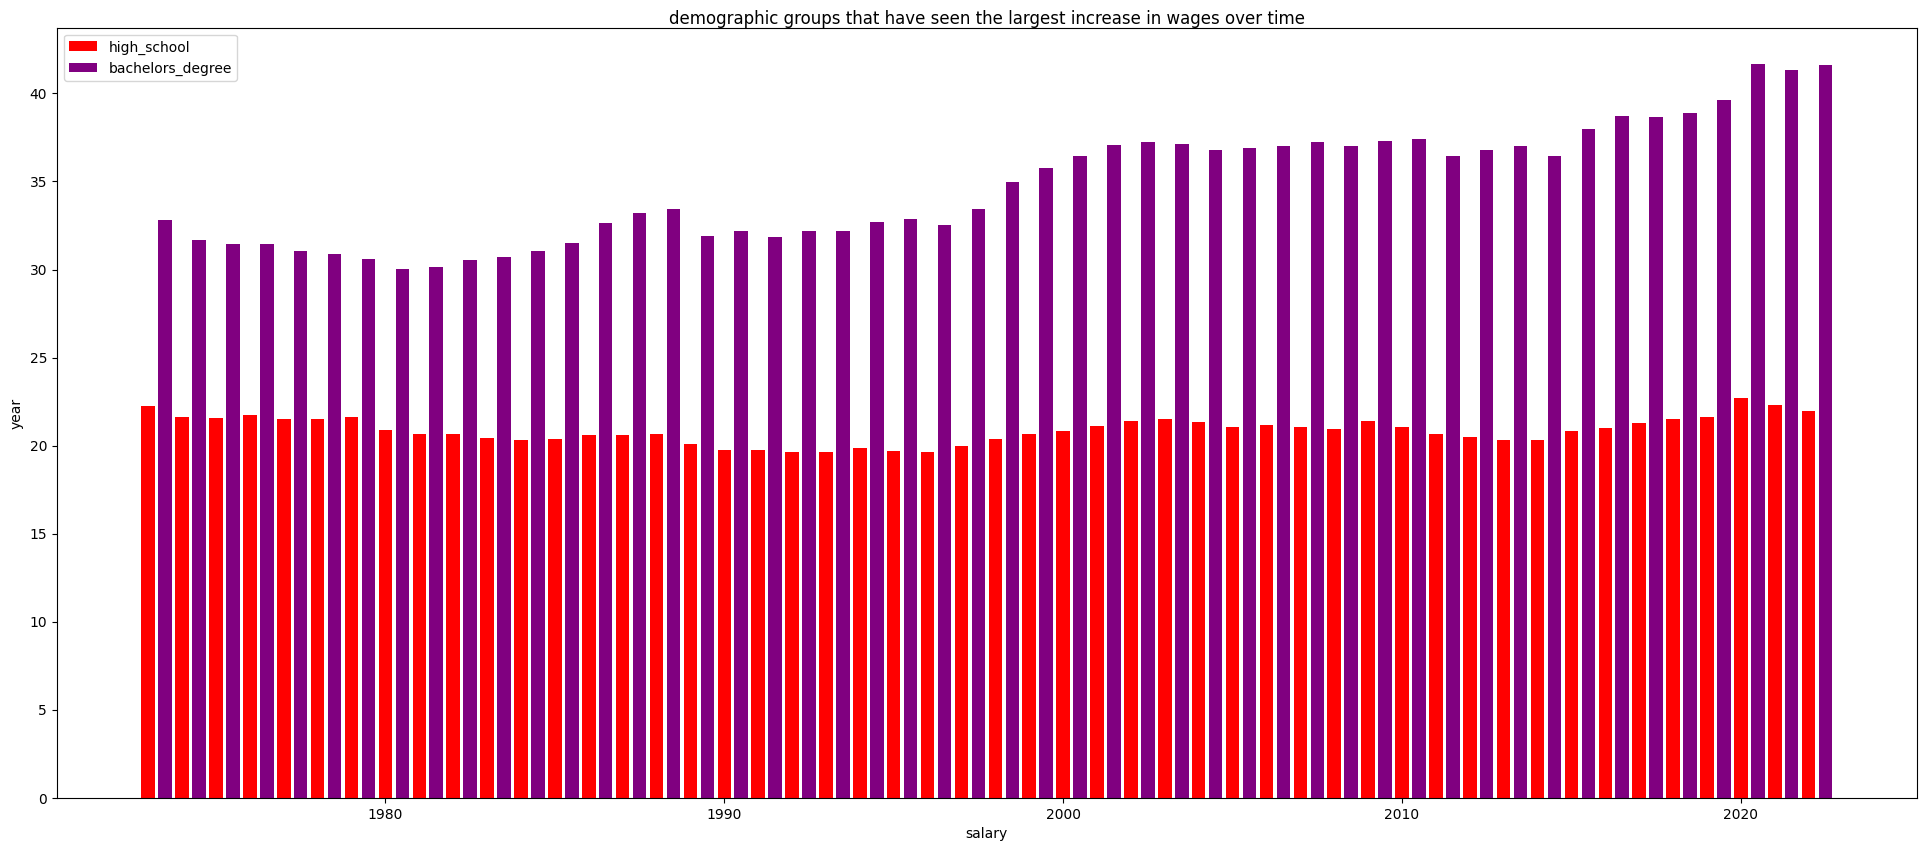

In [16]:
plt.figure(figsize=(24,10))
barWidth=0.4
plt.bar(college_wage_premium.index.year,college_wage_premium['high_school'],color='red',width=barWidth,label='high_school')
plt.bar(college_wage_premium.index.year+0.5,college_wage_premium['bachelors_degree'],color='purple',width=barWidth,label='bachelors_degree')
plt.title('demographic groups that have seen the largest increase in wages over time', loc='center', pad=0.2)
plt.xlabel('salary')
plt.ylabel('year')
plt.legend()
plt.show()

Compare the salary gap between men and women within each school group and analyze its evolution over the years

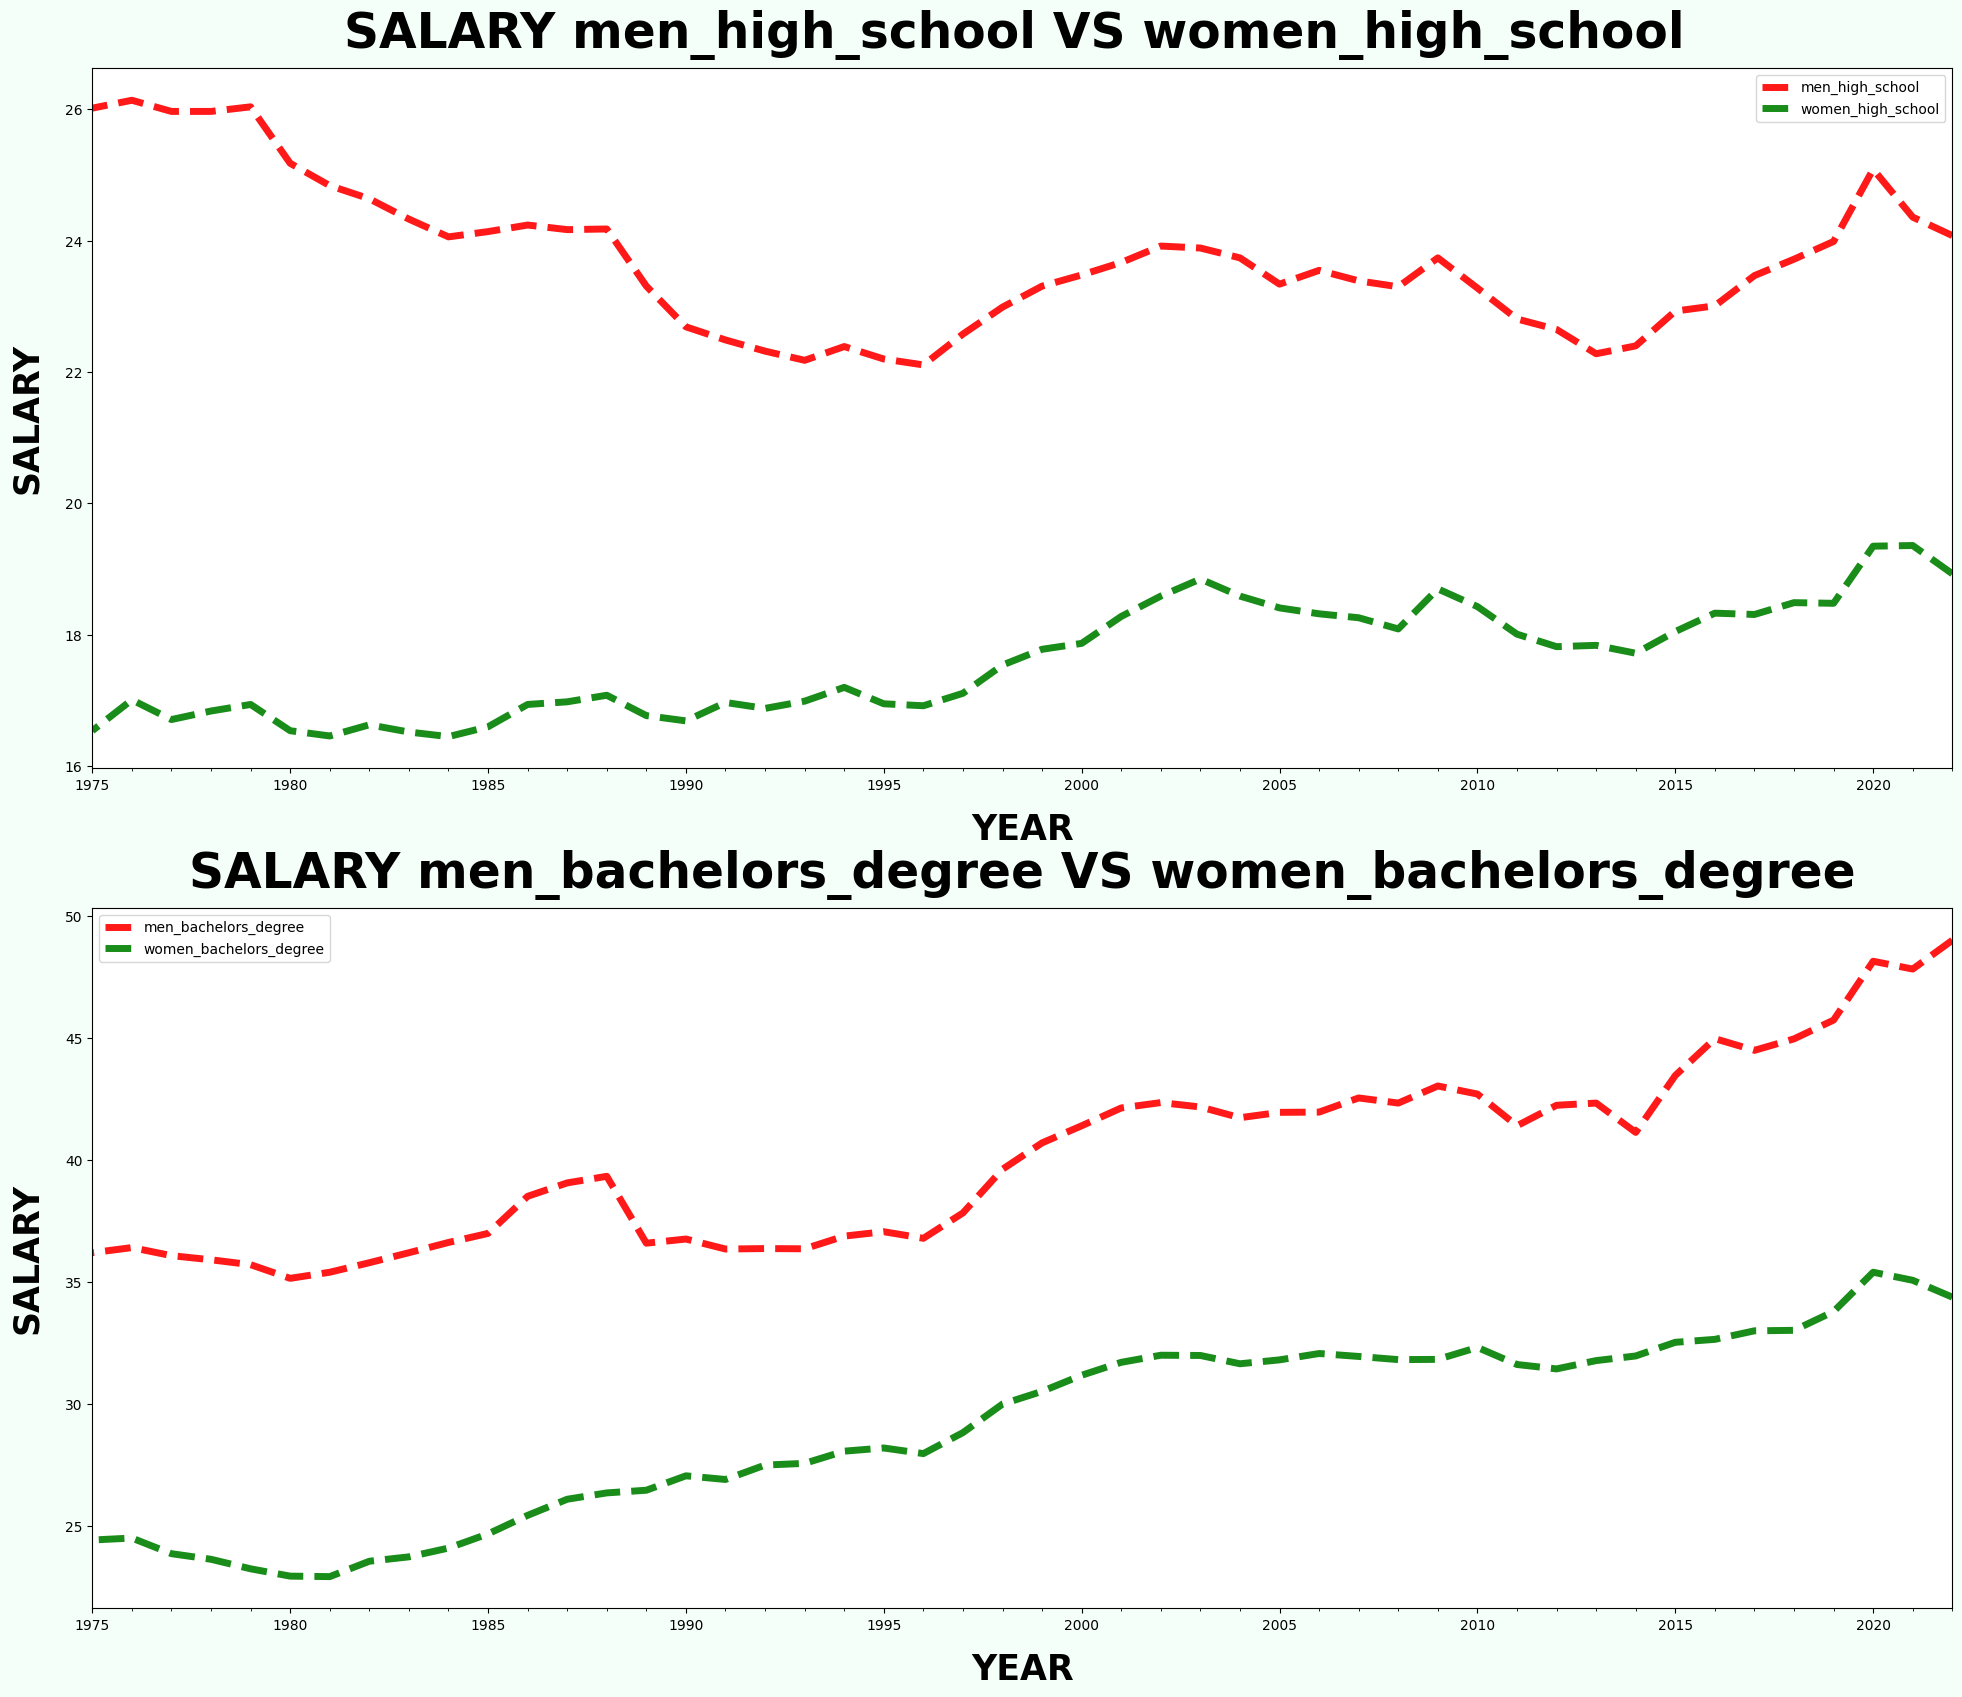

In [17]:
fig1 , ax1 =plt.subplots(
 2, 1,
 facecolor="mintcream",   
 figsize=(24, 20))
college_wage_premium.loc['1975':'2022','men_high_school'].plot(label='men_high_school',lw=5,color='red',ls='--',alpha=0.9,ax=ax1[0])
college_wage_premium.loc['1975':'2022','women_high_school'].plot(label='women_high_school',color='green',lw=5,ls='--',alpha=0.9,ax=ax1[0])
college_wage_premium.loc['1975':'2022','men_bachelors_degree'].plot(label='men_bachelors_degree',lw=5,color='red',ls='--',alpha=0.9,ax=ax1[1])
college_wage_premium.loc['1975':'2022','women_bachelors_degree'].plot(label='women_bachelors_degree',color='green',lw=5,ls='--',alpha=0.9,ax=ax1[1])
ax1[0].legend()
ax1[1].legend()
ax1[0].set_title(
 "SALARY men_high_school VS women_high_school ",
 fontname="fantasy",
 weight="bold",
 fontsize=35,
 pad=15)
ax1[1].set_title(
 "SALARY men_bachelors_degree VS women_bachelors_degree",
 fontname="fantasy",
 weight="bold",
 fontsize=35,
 pad=15)
ax1[0].set_ylabel(
 "SALARY",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
ax1[0].set_xlabel(
 "YEAR",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
ax1[1].set_ylabel(
 "SALARY",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
ax1[1].set_xlabel(
 "YEAR",
 weight="bold",
 color="black",
 family="fantasy",
 fontsize=25,
 loc="center",
 labelpad=15)
plt.show()